In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
col_1 = np.array([10,20,30,40,50,60,70,80,90])
 
col_2 = np.array([15,25,35,45,55,65,75,85,95])

In [ ]:
out = [] 
for i in range(len(col_1)):
  out.append(col_1[i] + col_2[i])
out_col = np.array(out)

In [ ]:
out_col

array([ 25,  45,  65,  85, 105, 125, 145, 165, 185])

In [ ]:
col_1 = col_1.reshape(len(col_1), 1)
col_2 = col_2.reshape(len(col_2), 1)
out_col = out_col.reshape(len(out_col), 1)

In [ ]:
data = np.hstack((col_1, col_2, out_col))

In [ ]:
data

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [ ]:
def feature_transform(n_steps, data):
  x = []
  y = [] 
  for i in range(n_steps, len(data) + 1):
    x.append(data[i - n_steps: i, : -1])
    y.append(data[i - 1, -1])
  return np.array(x), np.array(y)

In [ ]:
n_steps = 3

In [ ]:
x, y = feature_transform(n_steps, data)

In [ ]:
x, y

(array([[[10, 15],
         [20, 25],
         [30, 35]],
 
        [[20, 25],
         [30, 35],
         [40, 45]],
 
        [[30, 35],
         [40, 45],
         [50, 55]],
 
        [[40, 45],
         [50, 55],
         [60, 65]],
 
        [[50, 55],
         [60, 65],
         [70, 75]],
 
        [[60, 65],
         [70, 75],
         [80, 85]],
 
        [[70, 75],
         [80, 85],
         [90, 95]]]), array([ 65,  85, 105, 125, 145, 165, 185]))

In [ ]:
x.shape

(7, 3, 2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
 
model = Sequential() 
 
model.add(LSTM(50, activation = "relu", input_shape = (n_steps, x.shape[2])))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10600     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 16798.9277
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 16540.5762
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 16285.8057
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 16028.9072
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 15767.7676
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 15503.5908
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 15232.4277
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 14949.0088
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 14651.8535
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 14342.6650
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 14022.9229
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 13694.6709
Epoch 13/100
1

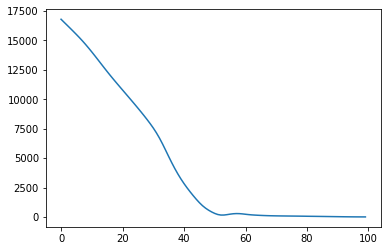

In [ ]:
plt.plot(history.history["loss"])
plt.show()

In [ ]:
# Testing 
 
x_test = np.array([[80, 85], [90, 95], [100, 105]])
 
x_test = x_test.reshape((1, 3, 2))

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[203.71259]], dtype=float32)

# Google Data

In [ ]:
train = pd.read_csv("/content/Google_Stock_Price_Train.csv")
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
x_train = train[["Open", "Close"]] 
x_train.head()

,Open,Close
0,325.25,663.59
1,331.27,666.45
2,329.83,657.21
3,328.34,648.24
4,322.04,620.76


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   Close   1258 non-null   object 
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [ ]:
x_train["Close"] = x_train["Close"].apply(lambda x:float(x.replace(",", "")))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.preprocessing import StandardScaler 
 
sc = StandardScaler() 
 
sc_x_train = sc.fit_transform(x_train)

In [ ]:
sc_x_train.shape

(1258, 2)

In [ ]:
out_col = sc_x_train[:,0] + sc_x_train[:,1] 
 
out_col

array([-1.67087244, -1.61386023, -1.67945005, ...,  2.15172044,
        2.0697037 ,  1.99927282])

In [ ]:
data = np.hstack((sc_x_train[:,0].reshape((out_col.shape[0], 1)), sc_x_train[:,1].reshape((out_col.shape[0], 1)), out_col.reshape((out_col.shape[0], 1))))
data

array([[-1.37285476, -0.29801768, -1.67087244],
       [-1.33320882, -0.28065141, -1.61386023],
       [-1.34269224, -0.33675781, -1.67945005],
       ...,
       [ 1.71221829,  0.43950216,  2.15172044],
       [ 1.64392454,  0.42577916,  2.0697037 ],
       [ 1.64010483,  0.35916799,  1.99927282]])

In [ ]:
def feature_transform(n_steps, data):
  x = []
  y = [] 
  for i in range(n_steps, len(data) + 1):
    x.append(data[i - n_steps: i, : -1])
    y.append(data[i - 1, -1])
  return np.array(x), np.array(y)

In [ ]:
n_steps = 12
 
x_train, y_train = feature_transform(n_steps,data)

In [ ]:
x_train.shape

(1247, 12, 2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
 
model = Sequential() 
 
model.add(LSTM(50, activation = "relu", input_shape = (n_steps, x.shape[2])))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 100, batch_size=30)

Epoch 1/100
42/42 [==============================] - 2s 6ms/step - loss: 1.4545
Epoch 2/100
42/42 [==============================] - 0s 6ms/step - loss: 0.1209
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0902
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0498
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0376
Epoch 6/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0205
Epoch 7/100
42/42 [==============================] - 0s 7ms/step - loss: 0.0123
Epoch 8/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0189
Epoch 9/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0120
Epoch 10/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0105
Epoch 11/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0061
Epoch 12/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 13/100
42/42 [=================

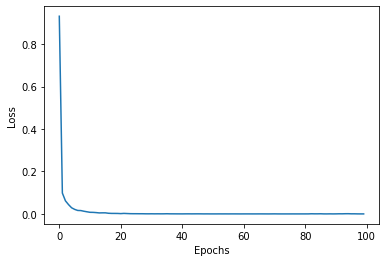

In [ ]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
test = pd.read_csv("/content/Google_Stock_Price_Test.csv")
test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
x_test = test[["Open", "Close"]]

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   Close   20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [ ]:
sc_x_test = sc.fit_transform(x_test)

In [ ]:
out_col = sc_x_test[:,0] + sc_x_test[:,1]
out_col

array([-3.63821297, -2.93139712, -2.53306873, -0.96828492, -0.17381045,
       -0.21923594, -0.17091485, -0.14613847, -0.00502307, -0.28612433,
       -0.2588774 , -0.60857951, -0.26581249,  0.86710126,  2.24212143,
        3.65510904,  3.93726257,  3.04041547,  0.05018159, -1.5867111 ])

In [ ]:
test_data = np.hstack((sc_x_test[:,0].reshape(out_col.shape[0], 1), sc_x_test[:,1].reshape(out_col.shape[0], 1), out_col.reshape(out_col.shape[0], 1)))

In [ ]:
x_test, y_test = feature_transform(n_steps, test_data)

In [ ]:
x_test.shape

(9, 12, 2)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
final = np.hstack((y_pred, y_test.reshape(-1,1)))
 
output = sc.inverse_transform(final)
 
Actual = output[:,1]
 
predicted = output[:,0]

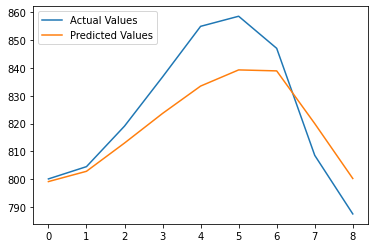

In [ ]:
plt.plot(Actual, label = "Actual Values")
plt.plot(predicted, label = "Predicted Values")
plt.legend()
plt.show()